In [1]:
import numpy as np
from numpy.matlib import repmat
from matplotlib import pyplot as plt
from scipy import signal as signal
import xarray as xr
from MGL2104_funcs import *
from seismic_funcs import *

In [2]:
# Useful Info
ci = complex(0,1)
Fs = 500
c = 1480

# Read nav data
nav = readP190_2104('/media/asd21/My Passport/MGL2104_PD12_CSs/MGL2104PD12.0.p190')

# Airgun Array info
srcD = 12
AirgunVols = repmat(np.array([360,360,40,180,90,120,60,220,220]),4,1)
xg = repmat(np.array([-8, -8, -4.77, -2.41, 0.23, 2.69, 5, 8, 8]),4,1)
yg = np.ones([4,9])*np.array([[12],[4],[-4],[-12]])
zg = repmat(srcD + np.array([0.55, -0.2, -0.2, 0, 0, 0, 0, 0.55, -0.2]),4,1)

# Figure: Maps and Layout

Images taken from cruise reports and receiver array layouts made in PPT

# Figure: CRG vs. CSG Waterfall Plots

In [3]:
CRGpth = '/media/asd21/My Passport/MGL2104_CRG_Samples/MGL2104_CRG_Rec10.nc' # CRG 10
CMPpth = '/media/asd21/My Passport/MGL2104_CMPs/CMP_05000.nc' # CMP 
CSGpth = '/media/asd21/My Passport/MGL2104_PD12_CSs/TAPE0034.REEL/R016352_1623080147.RAW' # Shot 700

CRGdataset = xr.open_dataset(CRGpth)
CRGdata = CRGdataset['Receiver Outputs']
CMPdataset = xr.open_dataset(CMPpth)
CMPdata = CMPdataset['datafilt']
CSGdata = readSegd_2104(CSGpth)[1].T

t = CMPdata['time']

##### CSG Data #####
# Find location of all receivers
rtmp = np.sqrt( (np.array(nav.receiverX[700]) - nav.sourceX[700])**2 + (np.array(nav.receiverY[700]) - nav.sourceY[700])**2 )

# Create waterfall data
recGap = 10
CSGtmp = np.copy(CSGdata)
sos = np.array([[1,-2,1,1,-1.82570619168342,0.881881926844246],[1,-2,1,1,-1.65627993129105,0.707242535896459],[1,-2,1,1,-1.57205200320457,0.620422971870477]])
CSGdata = signal.sosfilt(sos,CSGdata,axis=1)
CSGdata = np.flip(CSGdata,0)
for i in range(len(rtmp)):
    CSGtmp[i,:] = 5e-7*CSGdata[i,:] + rtmp[i]/1e3
    

##### CMP Data #####
# Find location of all shots for given receiver
cmp = 5000
rtmp = np.array(CMPdataset['offset'])

# Create waterfall data
cmpGap = 2
CMPtmp = np.copy(CMPdata)
sos = np.array([[1,-2,1,1,-1.82570619168342,0.881881926844246],[1,-2,1,1,-1.65627993129105,0.707242535896459],[1,-2,1,1,-1.57205200320457,0.620422971870477]])
CMPdata = signal.sosfilt(sos,CMPdata,axis=0)
for i in CMPdataset.rec:
    CMPtmp[i,:] = 5e-7*CMPdata[i,:] + rtmp[i]/1e4
    
    
##### CRG Data #####
# Find location of all shots for given receiver
rec = 1
x0 = nav.receiverX[0][rec]
y0 = nav.receiverY[0][rec]
rtmp = np.zeros(len(nav.receiverX))
for i in range(1,len(nav.receiverX)):
    xtmp = nav.receiverX[i][rec]
    ytmp = nav.receiverY[i][rec]
    rtmp[i] = np.sqrt( (xtmp-x0)**2 + (ytmp-y0)**2 )

# Create waterfall data
shotGap = 15
CRGtmp = np.copy(CRGdata)
# CRGdata = np.flip(CRGdata,1)
for i in range(len(CRGdata['shot'])):
    CRGtmp[i,:] = 1e-6*CRGdata[i,:] + rtmp[i]/1e3
CRGtmp = np.flip(CRGtmp[0:1401,:],0)

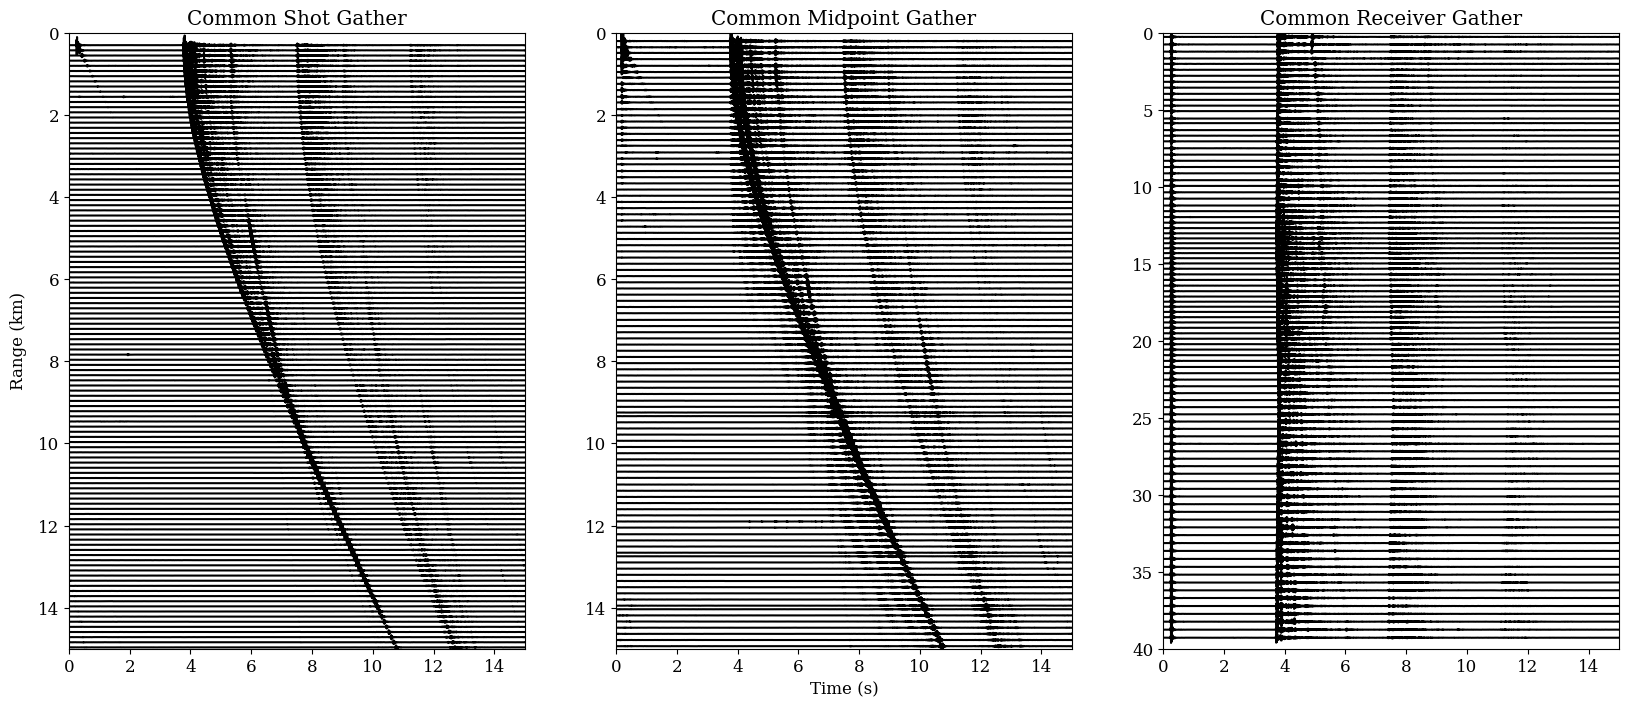

In [4]:
plt.rcParams.update({'font.size': 12})
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
    
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111)
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

# Turn off axis lines and ticks of the big subplot
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

ax1.plot(t,CSGtmp[0::recGap,:].T,'k')
ax2.plot(t,CMPtmp[0::cmpGap,:].T,'k')
ax3.plot(t,CRGtmp[0::shotGap,:].T,'k')
ax1.invert_yaxis()
ax2.invert_yaxis()
ax3.invert_yaxis()
ax1.set_xlim([0,15])
ax2.set_xlim([0,15])
ax3.set_xlim([0,15])
ax1.set_ylim([15,0])
ax2.set_ylim([15,0])
ax3.set_ylim([40,0])
ax.set_xlabel('Time (s)')
ax1.set_title('Common Shot Gather')
ax2.set_title('Common Midpoint Gather')
ax3.set_title('Common Receiver Gather')
ax.set_ylabel('Range (km)')
plt.show()

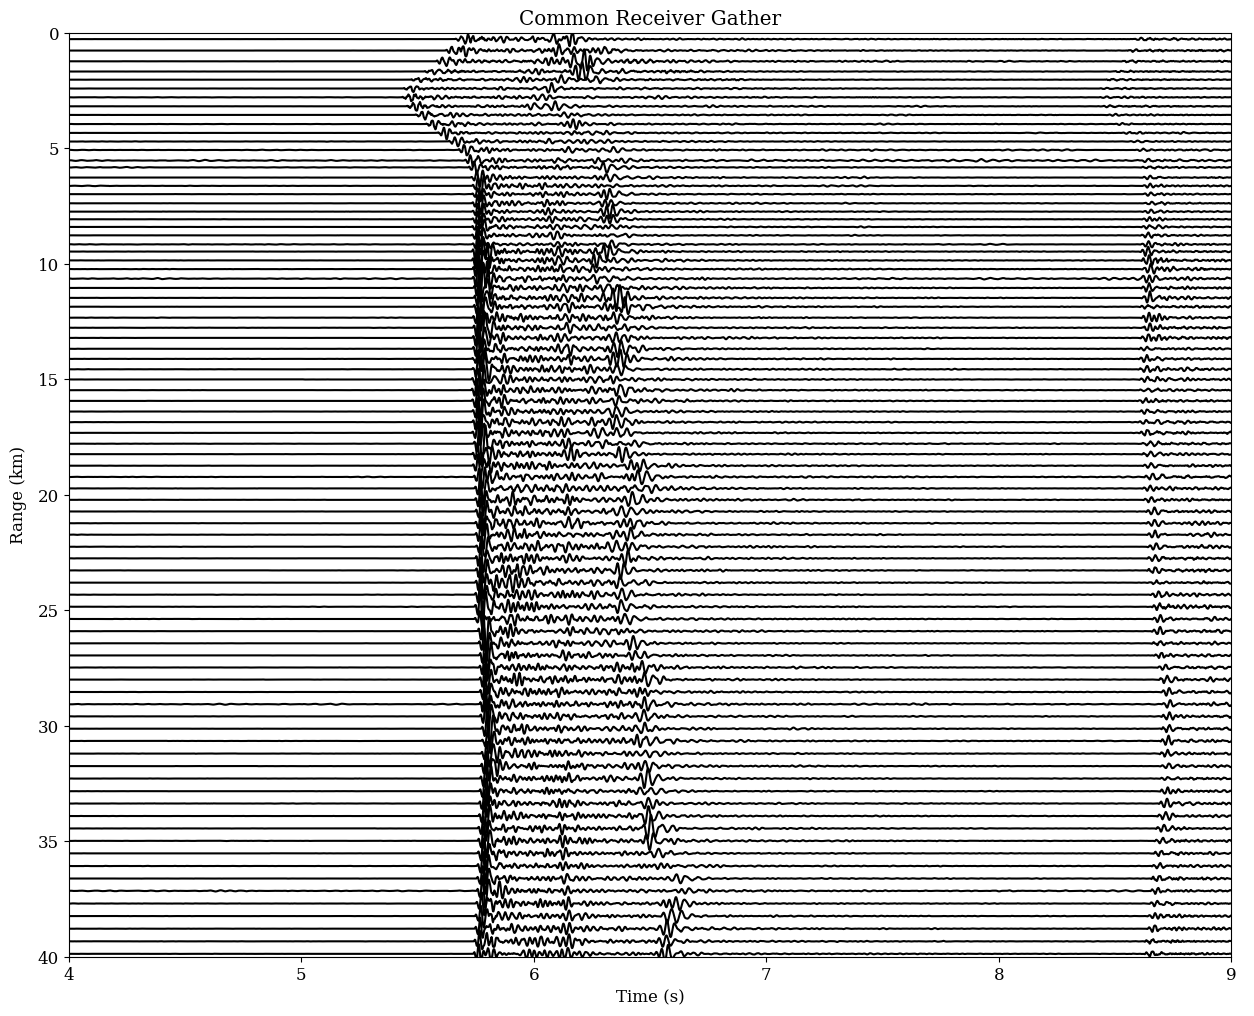

In [49]:

CRGpth = '/media/asd21/My Passport/MGL2104_CRG_Samples/MGL2104_CRG_Rec500.nc' # CRG 10

CRGdataset = xr.open_dataset(CRGpth)
CRGdata = CRGdataset['Receiver Outputs']
    
##### CRG Data #####
# Find location of all shots for given receiver
rec = 500
x0 = nav.receiverX[0][rec]
y0 = nav.receiverY[0][rec]
rtmp = np.zeros(len(nav.receiverX))
for i in range(1,len(nav.receiverX)):
    xtmp = nav.receiverX[i][rec]
    ytmp = nav.receiverY[i][rec]
    rtmp[i] = np.sqrt( (xtmp-x0)**2 + (ytmp-y0)**2 )

# Create waterfall data
shotGap = 15
CRGtmp = np.copy(CRGdata)
# CRGdata = np.flip(CRGdata,1)
for i in range(len(CRGdata['shot'])):
    CRGtmp[i,:] = 4e-6*CRGdata[i,:] + rtmp[i]/1e3
CRGtmp = np.flip(CRGtmp[0:1401,:],0)




plt.rcParams.update({'font.size': 12})
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
    
fig = plt.figure(figsize=(15,12))
ax = fig.add_subplot(111)
ax1 = fig.add_subplot(111)

# Turn off axis lines and ticks of the big subplot
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

ax1.plot(t,CRGtmp[0::15,:].T,'k')
ax1.invert_yaxis()
ax1.set_xlim([4,9])
ax1.set_ylim([40,0])
ax.set_xlabel('Time (s)')
ax1.set_title('Common Receiver Gather')
ax.set_ylabel('Range (km)')
plt.show()

# Figure: Source Signal Estimation

/home/asd21/miniconda3/envs/seismic/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


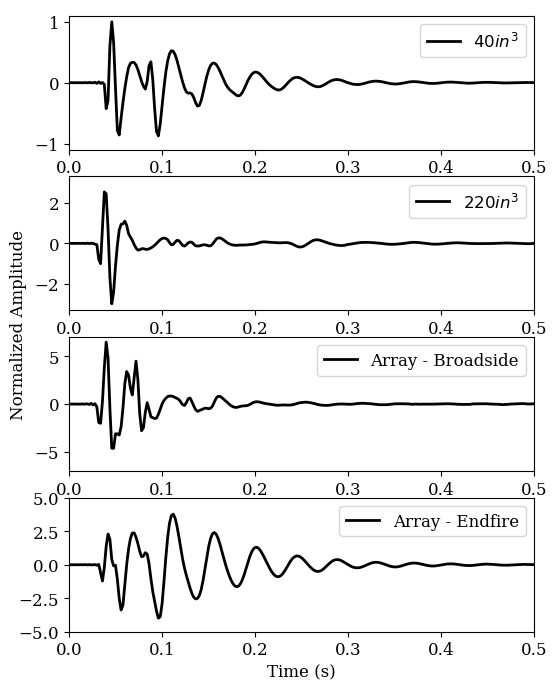

In [5]:
# AirgunData = np.load('AirgunSigsMGL2104.npz')
AirgunData = np.load('AirgunSigsMGL2104_New.npz')

Airgun40 = AirgunData['Airgun40'][0:500]
Airgun60 = AirgunData['Airgun60'][0:500]
Airgun90 = AirgunData['Airgun90'][0:500]
Airgun120 = AirgunData['Airgun120'][0:500]
Airgun180 = AirgunData['Airgun180'][0:500]
Airgun220 = AirgunData['Airgun220'][0:500]
Airgun360 = AirgunData['Airgun360'][0:500]

t_airgun = np.linspace(0,1,500)
f = np.fft.fftfreq(500,1/Fs)

AirgunVols = repmat(np.array([360,360,40,180,90,120,60,220,220]),4,1)
xg = repmat(np.array([-8, -8, -4.77, -2.41, 0.23, 2.69, 5, 8, 8]),4,1)
yg = np.ones([4,9])*np.array([[12],[4],[-4],[-12]])
zg = repmat(srcD + np.array([0.55, -0.2, -0.2, 0, 0, 0, 0, 0.55, -0.2]),4,1)

Airgun40End  = np.fft.ifft(np.fft.fft(Airgun40)*np.exp(ci*2*np.pi*f/c*xg[0][2]))
Airgun60End  = np.fft.ifft(np.fft.fft(Airgun40)*np.exp(ci*2*np.pi*f/c*xg[0][6]))
Airgun90End  = np.fft.ifft(np.fft.fft(Airgun40)*np.exp(ci*2*np.pi*f/c*xg[0][4]))
Airgun120End = np.fft.ifft(np.fft.fft(Airgun40)*np.exp(ci*2*np.pi*f/c*xg[0][5]))
Airgun180End = np.fft.ifft(np.fft.fft(Airgun40)*np.exp(ci*2*np.pi*f/c*xg[0][3]))
Airgun220End = np.fft.ifft(np.fft.fft(Airgun40)*np.exp(ci*2*np.pi*f/c*xg[0][7]))
Airgun360End = np.fft.ifft(np.fft.fft(Airgun40)*np.exp(ci*2*np.pi*f/c*xg[0][0]))

AirgunBroad = 2*Airgun360 + Airgun40 + Airgun180 + Airgun90 + Airgun120 + Airgun60 + 2*Airgun220
AirgunEnd = 2*Airgun360End + Airgun40End + Airgun180End + Airgun90End + Airgun120End + Airgun60End + 2*Airgun220End

# Define figure subplots
fig = plt.figure(figsize=(6,8))
ax = fig.add_subplot(111)
ax1 = fig.add_subplot(411)
ax2 = fig.add_subplot(412)
ax3 = fig.add_subplot(413)
ax4 = fig.add_subplot(414)

# Turn off axis lines and ticks of the big subplot
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

# 40 in3 Airgun
ax1.plot(t_airgun[:250],Airgun40[75:325]/np.max(np.abs(Airgun40)),'k',linewidth=2)
ax1.legend([r'$40in^3$'])
ax1.set_ylim([-1.1,1.1])
# ax1.set_ylim([-8,8])
ax1.set_xlim([0,0.5])

# Other size (220?)
ax2.plot(t_airgun[:250],Airgun220[75:325]/np.max(np.abs(Airgun40)),'k',linewidth=2)
ax2.legend([r'$220in^3$'])
ax2.set_ylim([-3.3,3.3])
# ax2.set_ylim([-8,8])
ax2.set_xlim([0,0.5])

# Broadside signal
ax3.plot(t_airgun[:250],AirgunBroad[75:325]/np.max(np.abs(Airgun40)),'k',linewidth=2)
ax3.legend(['Array - Broadside'])
ax3.set_ylim([-7,7])
# ax3.set_ylim([-8,8])
ax3.set_xlim([0,0.5])

# Endfire signal
ax4.plot(t_airgun[:250],AirgunEnd[75:325]/np.max(np.abs(Airgun40)),'k',linewidth=2)
ax4.legend(['Array - Endfire'])
ax4.set_ylim([-5,5])
# ax4.set_ylim([-8,8])
ax4.set_xlim([0,0.5])

ax.set_xlabel('Time (s)')
ax.set_ylabel('Normalized Amplitude')

plt.show()

## Figure - Reflection Inversion on Single Receiver

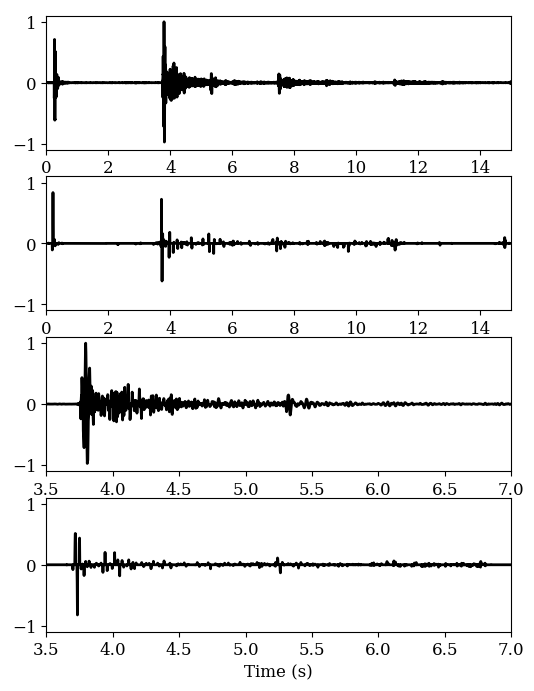

In [6]:
t = np.linspace(0,15,7501)
rec = -11
sigma = 0.1

i0 = 0
i1 = 7501
angle = np.arctan((2*2700)/(200+(-rec-2)*12.5))*180/np.pi
srcSig = np.real(SigExp([xg.flatten(),yg.flatten(),zg.flatten()], AirgunVols.flatten(), angle, ghost=False))
srcSig = srcSig/np.max(srcSig)
invData = CSGdata[rec,i0:i1]
invData = invData/np.max(np.abs(invData))
invOut = RefInv(invData,srcSig,[20,30],Fs=500,sigma=sigma,iters=1000)

fig = plt.figure(figsize=(6,8))
ax = fig.add_subplot(111)
ax1 = fig.add_subplot(411)
ax2 = fig.add_subplot(412)
ax3 = fig.add_subplot(413)
ax4 = fig.add_subplot(414)

# Turn off axis lines and ticks of the big subplot
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)
ax.set_xlabel('Time (s)')

# Raw Data
ax1.plot(t[i0:i1],invData,'k',linewidth=2)
ax1.set_ylim([-1.1,1.1])
ax1.set_xlim([0,15])

# Inversion Data
ax2.plot(t[i0:i1],invOut[0:(i1-i0)],'k',linewidth=2)
ax2.set_ylim([-1.1,1.1])
ax2.set_xlim([0,15])

i0 = 1750
i1 = 3501

invData = CSGdata[rec,i0:i1]
invData = invData/np.max(np.abs(invData))
invOut = RefInv(invData,srcSig,[20,60],Fs=500,sigma=sigma,iters=1000)

# Raw Data
ax3.plot(t[i0:i1],invData,'k',linewidth=2)
ax3.set_ylim([-1.1,1.1])
ax3.set_xlim([3.5,7])

# Inversion Data
ax4.plot(t[i0:i1],invOut[0:(i1-i0)],'k',linewidth=2)
ax4.set_ylim([-1.1,1.1])
ax4.set_xlim([3.5,7])
plt.show()


## Figure - Reflection Inversion on full waterfall plot.

In [7]:
t = np.linspace(0,15,7501)
rec = 10
i0 = 0
i1 = 7501
sigma = 0.1

angle = np.arctan((2*2700)/(200+(rec-1)*12.5))*180/np.pi
srcSig = np.real(SigExp([xg.flatten(),yg.flatten(),zg.flatten()], AirgunVols.flatten(), angle, ghost=False))
srcSig = srcSig/np.max(srcSig)

invOut = np.zeros([np.size(CRGdata,0),int((i1-i0)/2)])
dShot = 10

# rtmp = np.zeros(len(nav.receiverX))
# for i in range(1,len(nav.receiverX)):
#     xtmp = nav.receiverX[i][rec]
#     ytmp = nav.receiverY[i][rec]
#     rtmp[i] = np.sqrt( (xtmp-x0)**2 + (ytmp-y0)**2 )
    
for shot in range(0,1401,dShot):
    invData = CRGdata[shot,i0:i1]
    invOut[shot,:] = 1e-5*RefInv(invData,srcSig,[22,28],Fs=500,sigma=sigma,iters=1000)[0:int((i1-i0)/2)] + rtmp[shot]/1e3

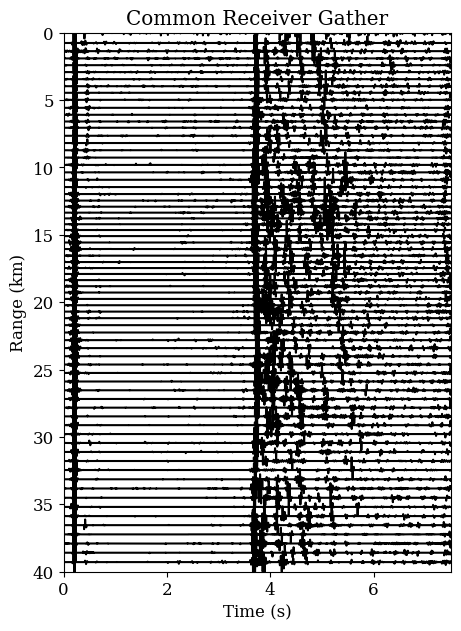

In [8]:
plt.rcParams.update({'font.size': 12})
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
    
fig = plt.figure(figsize=(5,7))
ax = fig.add_subplot(111)

ax.plot(t[i0:int(i0+(i1-i0)/2)],invOut[0::2*dShot,:].T,'k')
ax.invert_yaxis()
ax.set_xlim([0,7.5])
ax.set_ylim([40,0])
ax.set_xlabel('Time (s)')
ax.set_title('Common Receiver Gather')
ax.set_ylabel('Range (km)')
plt.show()

## Figures - Surf Plots of SEL vs shot & rec (or range & range)

## Figures - Surf Plots of SEL vs shot & rec (or range & range)
